## Rnf stoichometery is dependent on proton motive force aw well as substrate and product mid point potential. 
----------

*I have used the book Bioenergetics 4  (2013) by David Nicholls and Stuart Ferguson as my main reference for all equations*

-----------
Rnf has only been characterized biochemically as a Na pump in acetogens, here they determine a stoichometery of 2 Na / electrons from reduced ferredoxin (Fd) to NADH. While Rnf has not been characterized in aerobic metabolism where is uses the consumption of protons to facilitate the reduxtion of Fd from NADH. By determining the stoichometery we can see how Rnf interacts with the whole electron transport system. (Below)

------------------------

![The Eelctron trasnport system of *A. vinelandii*](Images/Fullmodel.png)

-------------------------------
To see how much of an effect the $\frac{NAD^+}{NADH}$ ratio has on the thermodynamics of Rnf we will calculate the mid-point potential of $\frac{NAD^+}{NADH}$ using the Nerst equation:
$$E = E^{o'} + 2.3\frac{RT}{nF}log_{10}\left(\frac{[oxidised]}{[reduced]}\right)$$
Where $R$ is the gas constant, $F$ is the Faraday constant

To utilize the Nerst equation we will use the $\frac{NAD^+}{NADH}$ ratio from Garcia et al (2018): 


| OTR ($mmol/L$)| $\frac{NAD^+}{NADH}$ |
|---|---|
| 2.4 | 12.5 |
| 6.4 | 4.35 |


 Where different  Oxygen transfer rates (OTR) where used to determine the respiration rate. 
 
 For $\frac{NAD^+}{NADH}$ redox couple $E^{o'} = -320mv$, but for the nerst equation allowing for the actual cellular redox potential of $\frac{NAD^+}{NADH}$ to be determine by this equation: 
 
$$E = -320 + 2.3\frac{0.008134 \cdot 303}{2 \cdot 96.5}log_{10}(Q)$$

Where $Q$ is the $\frac{NAD^+}{NADH}$ ratio. 

We can use python to calculate the above equation and calculate the cellular redox potential for any ratio of $\frac{NAD^+}{NADH}$:

In [113]:
#First import the following packages
import math
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#give physical constants
R = 0.008314 #Gas constant (KJ/ K mol)
T = 303 #Temp at 30C (K)
F = 96.5 #Faraday (KJ / volt gram eq)

#define the nest function
def nerst(E_m7, n, Q):
    #equation in volts so -230 mv is -0.23 v
    return  E_m7 + (2.3*(R*T)/(n*F)) * math.log10(Q)
    #print(E)

In [115]:
#determine the midpoinit potenital at a 12.5 NAD/NADH ratio
nerst(-0.320, 2,  12.5)

-0.28706981454313457

In [116]:
#determine the midpoinit potenital at a 4.35 NAD/NADH ratio
nerst(-0.320, 2,  4.35)

-0.30083200135435545

With these calculation we can see that the mid point potential is -287 mv at 12.5 ratio and -300 mv at 4.5 ratio. 


We can also plot the values for all ratios of $\frac{NAD^+}{NADH}$

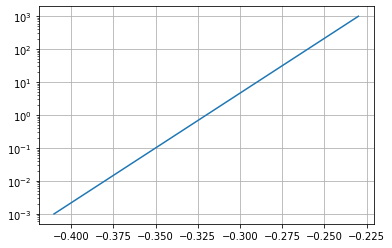

In [117]:

E = []
Q_i = []
for i in np.geomspace(0.001,1000,10000 ):
    E_i = nerst(-0.320, 2, i)
    E.append(E_i)
    Q_i.append(i)

fig = plt.figure()
ax = plt.gca()
ax.plot(E, Q_i)
ax.set_yscale('log')
ax.grid()


So we can see that while the $\frac{NAD^+}{NADH}$ does effect the mid point potential only in the extremes is it going to cause some reactions to be infeasable or something like NADH reducing Ferredoxin or flavodoxin which have a mid point potential around -500. 

These answers from above now allow use to ask what the $\Delta G$ of the Rnf reaction. 

Firsts lets lay out the stoichiometery of the reaction:

$$ NADH + 2 Fd_{ox} + nH_{p}^{+} -> NAD^+ + 2 Fd_{red} + nH_{c}^{+} $$

Where $H_{p}^{+}$ is periplasm proton and $nH_{c}^{+}$ is the cytoplasm proton and $n$ is the number of protons translocated. 

For the redox reaction between NADH and Fd we must calculate $\Delta E_h$:

$$\Delta E_h = E_{h(A)} - E_{h(B)} $$

Where the midpoint potential of Flavodoxin is -483 mv (Segal et al 2016), so $\Delta E_h$ is:

$$ \Delta E_h = -196 mv \left(\frac{NAD^+}{NADH} = 12.5\right) $$
$$ \Delta E_h = -183 mv \left(\frac{NAD^+}{NADH} = 4.35\right) $$

Then to calculate $\Delta G$ we use:

$$ \Delta G = -nF \Delta E_h$$

Giving:

$$ \Delta G = + 37.82 \frac{KJ}{mol} \left(\frac{NAD^+}{NADH} = 12.5\right) $$
 $$ \Delta G = + 35.31 \frac{KJ}{mol} \left(\frac{NAD^+}{NADH} = 4.35\right) $$
 
  The $\Delta G$ is positive as Fd is at a lower mid point potential than NADH hence the need for proton motive force to drive this reaction forward. 
  
  The proton motive force  $\Delta p$ was measured once in *A. vinelandii*  in Laane et al (1980) and present as the electric potential $\Delta \psi$ at $106\ mv$  and the change in pH $\Delta pH$ at $0.45\ pH$. We can calculate the proton motive force in $\Delta \mu_{H^{+}}$ for $\frac{KJ}{mol}$ or $\Delta p$ for $mv$ through the following equations:
  
  $$ \Delta \mu_{H^{+}} = -F \Delta \Psi + 2.3RT \Delta pH $$
  $$ \Delta p = \frac{-\Delta \mu_{H^{+}}}{F} $$
  
  Giving a $\Delta \mu_{H^{+}} = -7.621\left ( \frac{KJ}{mol}\right )$ and $\Delta p = 79.9 mv$
 
 With this information we now have two ways of calculating the protons required to facilitate electron transfer. First when electrons enter and leave the on the same side of the membrane we can use the simple relationship between proton motive for and the redox span:
 
 $$n \Delta p = 2 \Delta E_h$$
 
 Where $\Delta p$ is the proton motive force in mv and $n$ is the number of protons required for translocation and the 2 for the 2 electrons transfer in the redox span.  Solving for $n$ gives: 
 
 $$ n = \left (\frac{2 \Delta E_h}{\Delta p} \right) $$
 
 Producing a proton to electron ratio:
 
 $$ n = -4.906\ H^+/2e^-\ for \ \left(\frac{NAD^+}{NADH} = 12.5\right) $$
  $$ n = -4.580\ H^+/2e^-\ for \ \left(\frac{NAD^+}{NADH} = 4.35\right) $$
  
  The next way to  calculate using the $\Delta G$ and $\Delta \mu_{H^{+}}$ by understanding that in order to make the reaction favorable $\Delta G^{tot} \leq 0$ 
  
  Meaning the $\Delta G$ of the redox reaction must at least equal the $\Delta \mu_{H^{+}}$
  
  $$ \Delta G = n \cdot \Delta \mu_{H^{+}} $$
  or
  
  $$ \frac{\Delta G}{\Delta \mu_{H^{+}}} = n $$


From this we get :

 $$ n = -4.962\ H^+/2e^- \ for\ \left(\frac{NAD^+}{NADH} = 12.5\right) $$
  $$ n = -4.633\ H^+/2e^- \ for\ \left(\frac{NAD^+}{NADH} = 4.35\right) $$
  
  Both of ways are very similar  and probably only different due rounding errors. We can also see that even at low  $\frac{NAD^+}{NADH}$ ratio we have a similar proton rate of 4.5-5. 
  
  This makes much more sense than the described $2\ H^+/2e^-$ stoichiometery given for proton pumping with acetogens and which is annotate in most databases for RNF. 
  
_________________________________

### Rnf and the realtionship to proton motive force

Now we can take this information and show how Rnf would be influenced by the proton motive force and how this couold make it a conditionally enzyme with use under higher proton motive forces. 

We can simply plot the realtionship between the $\Delta G$ of Rnf and $\Delta \mu_{H^{+}}$ and plot the linear relationship:

 $$ \Delta G = \Delta G^{o} + 2.3RTlog(Q) - 5 \cdot \Delta \mu_{H^{+}} $$
 
 Where 
 
 $$ \Delta G^{o} = -2F \cdot -0.196\ v $$ 
 $$ \Delta G^{o} = 37.82\ KJ/mol$$
 
 With 2 electrons transfers and $\Delta E_h= -196 \ mv$ for the NADH/Fd couple

 




Text(0, 0.5, '$\\Delta G^{RNF}\\ _{(KJ/mol)}$')

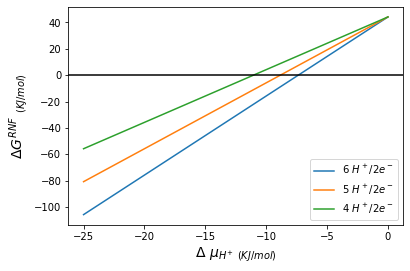

In [118]:
def dG_rxn(G_o, n, Q, u_h):
    return  G_o + (2.3*(R*T)) * math.log10(Q) + (n*u_h)




xvals = np.linspace(-25,0,100 )
d_Gi_6h = dG_rxn(37.82, 6, 12.5, xvals)
d_Gi_5h = dG_rxn(37.82, 5, 12.5, xvals)
d_Gi_4h = dG_rxn(37.82, 4, 12.5, xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, d_Gi_6h, label =r"$6\ H^+/2e^-$")
ax.plot(xvals, d_Gi_5h, label =r"$5\ H^+/2e^-$")
ax.plot(xvals, d_Gi_4h, label =r"$4\ H^+/2e^-$")
ax.axhline(y=0, color="black")
plt.legend(loc ='lower right')
plt.xlabel(r'$\Delta\ \mu_{H^{+}}\ _{(KJ/mol)}$', fontsize = 14)
plt.ylabel(r'$\Delta G^{RNF}\ _{(KJ/mol)}$', fontsize = 14)

In the end of the day we want to compare the thermodynamics of both the Fix enzyme and the Rnf emzyme as they both interact witht the proton motive force but in diffrent ways. As we saw before the ratio of substarate or product has an effect but small on the total $\Delta G$ of the reaction as well as E coli papers showing close to Eq for quinone/quniol ratios. 

The $\Delta G$ for Fix is -36.7 (Ledbetter et al 2017)

So we can plot this on the line and show how Fix and Rnf become favorable in diffrent conditions


Text(-5, -33, '$\\Delta G^{FIX}$')

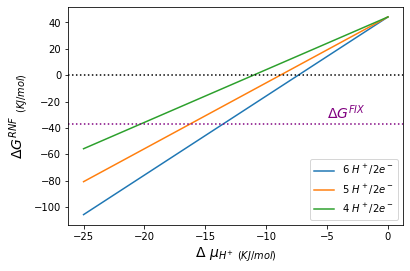

In [119]:
xvals = np.linspace(-25,0,100 )
d_Gi_6h = dG_rxn(37.82, 6, 12.5, xvals)
d_Gi_5h = dG_rxn(37.82, 5, 12.5, xvals)
d_Gi_4h = dG_rxn(37.82, 4, 12.5, xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, d_Gi_6h, label =r"$6\ H^+/2e^-$")
ax.plot(xvals, d_Gi_5h, label =r"$5\ H^+/2e^-$")
ax.plot(xvals, d_Gi_4h, label =r"$4\ H^+/2e^-$")
ax.axhline(y=0, color="black", linestyle = ":")
ax.axhline(y=-36.7, color="purple", linestyle = ":")
plt.legend(loc ='lower right')
plt.xlabel(r'$\Delta\ \mu_{H^{+}}\ _{(KJ/mol)}$', fontsize = 14)
plt.ylabel(r'$\Delta G^{RNF}\ _{(KJ/mol)}$', fontsize = 14)
plt.annotate(r'$\Delta G^{FIX}$', (-5,-33) , fontsize = 14, color = "purple")

While loking at this system we can divide it into three parts, 1) (0->-7.62) where the proton motive force is too low for favorable Fd reduction in Rnf, 2) (7.62 ->~14) Where the thermodynamics of RNf are favorable but the Fix enzyme is still more favorable, adn 3) where Rnf is more favorable than Fix. 


___________________________
### Citations

Nicholls, D. G., &amp; Ferguson, S. (2013). Bioenergetics4. Jordon Hill: Elsevier Science.

García A, Ferrer P, Albiol J, Castillo T, Segura D, Peña C. 2018. Metabolic flux analysis and the NAD(P)H/NAD(P)+ ratios in chemostat cultures of Azotobacter vinelandii. Microb Cell Fact 17.

Segal HM, Spatzal T, Hill MG, Udit AK, Rees DC. 2017. Electrochemical and structural characterization of Azotobacter vinelandii flavodoxin II. Protein Science 26:1984–1993.

Laane C, Krone W, Konings W, Haaker H, Veeger C. 1980. Short-term effect of ammonium chloride on nitrogen fixation by Azotobacter vinelandii and by bacteroids of Rhizobium leguminosarum. European journal of biochemistry / FEBS 103:39–46.

Ledbetter RN, Garcia Costas AM, Lubner CE, Mulder DW, Tokmina-Lukaszewska M, Artz JH, Patterson A, Magnuson TS, Jay ZJ, Duan HD, Miller J, Plunkett MH, Hoben JP, Barney BM, Carlson RP, Miller AF, Bothner B, King PW, Peters JW, Seefeldt LC. 2017. The electron bifurcating FixABCX protein complex from Azotobacter vinelandii: generation of low-potential reducing equivalents for nitrogenase catalysis. Biochemistry 56:4177–4190.
